In [2]:
import os
import sys

ROOT = os.path.dirname(os.path.dirname(os.path.abspath('.')))
print("ROOT", ROOT)

ROOT /scratch/cs/world-models/merlerm1/open-world-symbolic-planner


In [3]:
sys.path.append(ROOT)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from viplan.planning.igibson_client_env import iGibsonClient

[INFO] [18:56:40] 
Reset successful: True


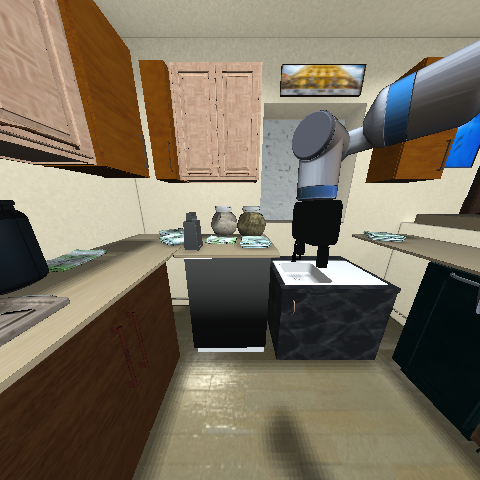

In [25]:
task = "cleaning_out_drawers"
scene_id = "Benevolence_1_int"
instance_id = 0
base_url = "http://dgx9:8000"

env = iGibsonClient(task=task, scene_id=scene_id, instance_id=instance_id, problem=None, base_url=base_url)
env.render()

In [26]:
env.state

{'reachable': {'bowl_1': False,
  'bowl_2': False,
  'cabinet_1': False,
  'cabinet_2': True,
  'spoon_1': False,
  'spoon_2': False,
  'piece_of_cloth_1': False,
  'sink_1': True},
 'holding': {'bowl_1': False,
  'bowl_2': False,
  'spoon_1': False,
  'spoon_2': False,
  'piece_of_cloth_1': False},
 'open': {'cabinet_1': False, 'cabinet_2': False},
 'ontop': {'bowl_1,bowl_2': False,
  'bowl_1,cabinet_1': False,
  'bowl_1,cabinet_2': False,
  'bowl_1,spoon_1': False,
  'bowl_1,spoon_2': False,
  'bowl_1,piece_of_cloth_1': False,
  'bowl_1,sink_1': False,
  'bowl_1,floor_1': False,
  'bowl_2,bowl_1': False,
  'bowl_2,cabinet_1': False,
  'bowl_2,cabinet_2': False,
  'bowl_2,spoon_1': False,
  'bowl_2,spoon_2': False,
  'bowl_2,piece_of_cloth_1': False,
  'bowl_2,sink_1': False,
  'bowl_2,floor_1': False,
  'spoon_1,bowl_1': False,
  'spoon_1,bowl_2': False,
  'spoon_1,cabinet_1': False,
  'spoon_1,cabinet_2': True,
  'spoon_1,spoon_2': False,
  'spoon_1,piece_of_cloth_1': False,
  'spoo

In [27]:
env._get_visible_objects()

['cabinet_2', 'sink_1']

In [30]:
visible_objects = set(env._get_visible_objects())
print(visible_objects)
if visible_objects is not None:
    visible_preds = {}
    for predicate in env.state:
        for args in env.state[predicate].keys():
            if all([arg in visible_objects for arg in args.split(',')]):
                if predicate not in visible_preds:
                    visible_preds[predicate] = {}
                visible_preds[predicate][args] = env.state[predicate][args]
                

visible_preds

{'cabinet_2', 'sink_1'}


{'reachable': {'cabinet_2': True, 'sink_1': True},
 'open': {'cabinet_2': False}}

In [31]:
env.apply_action("navigate-to", ["cabinet_1"])

[INFO] [18:59:48] 
Action legal: True
[INFO] [18:59:48] 
Action execution successful: success


(True, 'success')

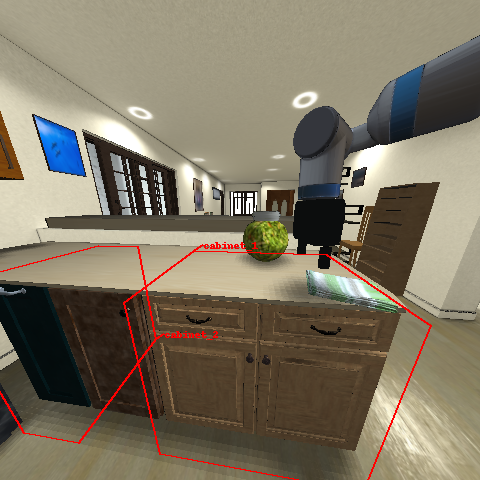

In [32]:
env.render()

In [33]:
env.apply_action("open-container", ["cabinet_1"])

[INFO] [19:01:10] 
Action legal: True
[INFO] [19:01:10] 
Action execution successful: success


(True, 'success')

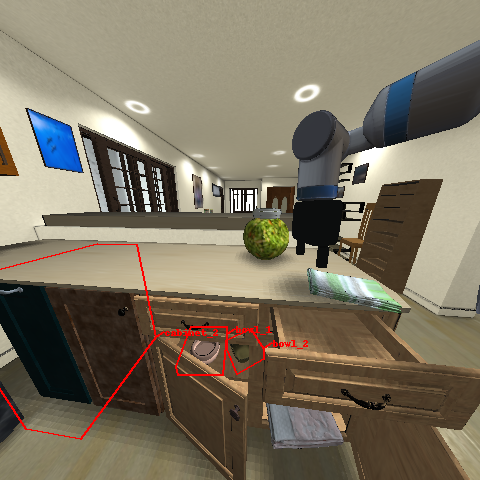

In [34]:
env.render()

In [35]:
env._get_visible_objects()

['bowl_1', 'bowl_2', 'cabinet_1', 'cabinet_2', 'piece_of_cloth_1']

In [37]:
env.visible_predicates

{'reachable': {'bowl_1': True,
  'bowl_2': True,
  'cabinet_1': True,
  'cabinet_2': True,
  'piece_of_cloth_1': True},
 'holding': {'bowl_1': False, 'bowl_2': False, 'piece_of_cloth_1': False},
 'open': {'cabinet_1': True, 'cabinet_2': False},
 'ontop': {'bowl_1,bowl_2': False,
  'bowl_1,cabinet_1': False,
  'bowl_1,cabinet_2': False,
  'bowl_1,piece_of_cloth_1': False,
  'bowl_2,bowl_1': False,
  'bowl_2,cabinet_1': False,
  'bowl_2,cabinet_2': False,
  'bowl_2,piece_of_cloth_1': False,
  'piece_of_cloth_1,bowl_1': False,
  'piece_of_cloth_1,bowl_2': False,
  'piece_of_cloth_1,cabinet_1': False,
  'piece_of_cloth_1,cabinet_2': False},
 'inside': {'bowl_1,cabinet_1': True,
  'bowl_1,cabinet_2': False,
  'bowl_2,cabinet_1': True,
  'bowl_2,cabinet_2': False,
  'piece_of_cloth_1,cabinet_1': True,
  'piece_of_cloth_1,cabinet_2': False},
 'nextto': {'bowl_1,bowl_2': True,
  'bowl_1,cabinet_1': True,
  'bowl_1,cabinet_2': False,
  'bowl_1,piece_of_cloth_1': False,
  'bowl_2,bowl_1': True,
